In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
!pip install datafold

In [28]:
import sys
sys.path.append('/content/drive/MyDrive/mlcms')
import Diffusion_Map

In [29]:
from Diffusion_Map import *
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [30]:
import mpl_toolkits.mplot3d.axes3d as Axes3D
from sklearn import datasets, manifold
from sklearn.datasets import make_swiss_roll

In [31]:
import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

bonus Task

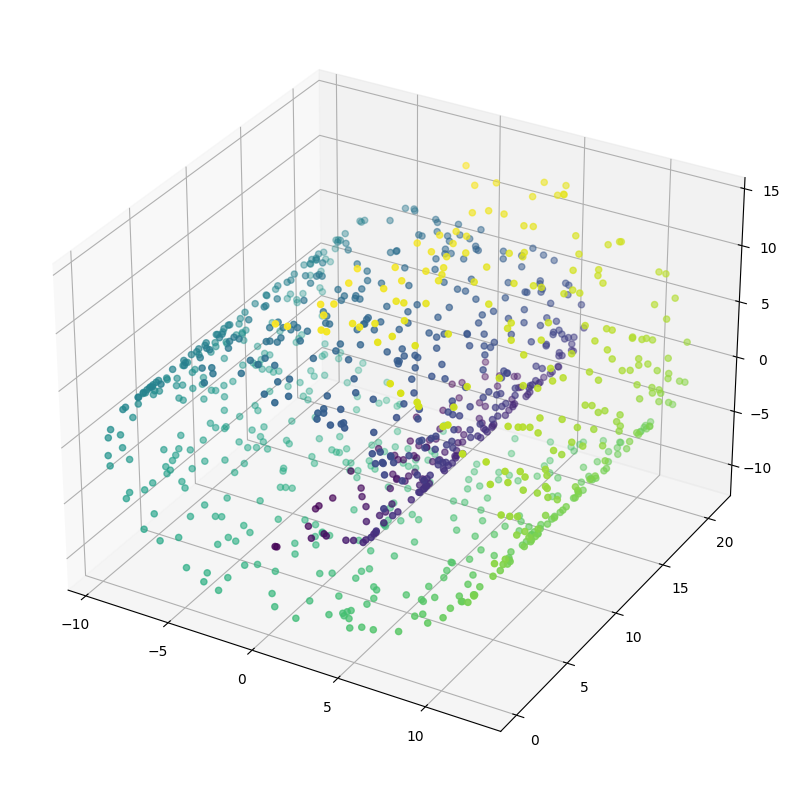

In [32]:
#---Generate Swiss roll data set and plot---

# Swiss roll with 5000 points
n = 1000
x, t = make_swiss_roll(n)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=t)
plt.savefig("ex3_task2_bonus_1.png")
plt.show()

In [46]:
L = 10
eigenvalues, eigenvectors=diffusion_map(x,L)

In [38]:
import importlib
import Diffusion_Map
importlib.reload(Diffusion_Map)
from Diffusion_Map import plot_phi_vals


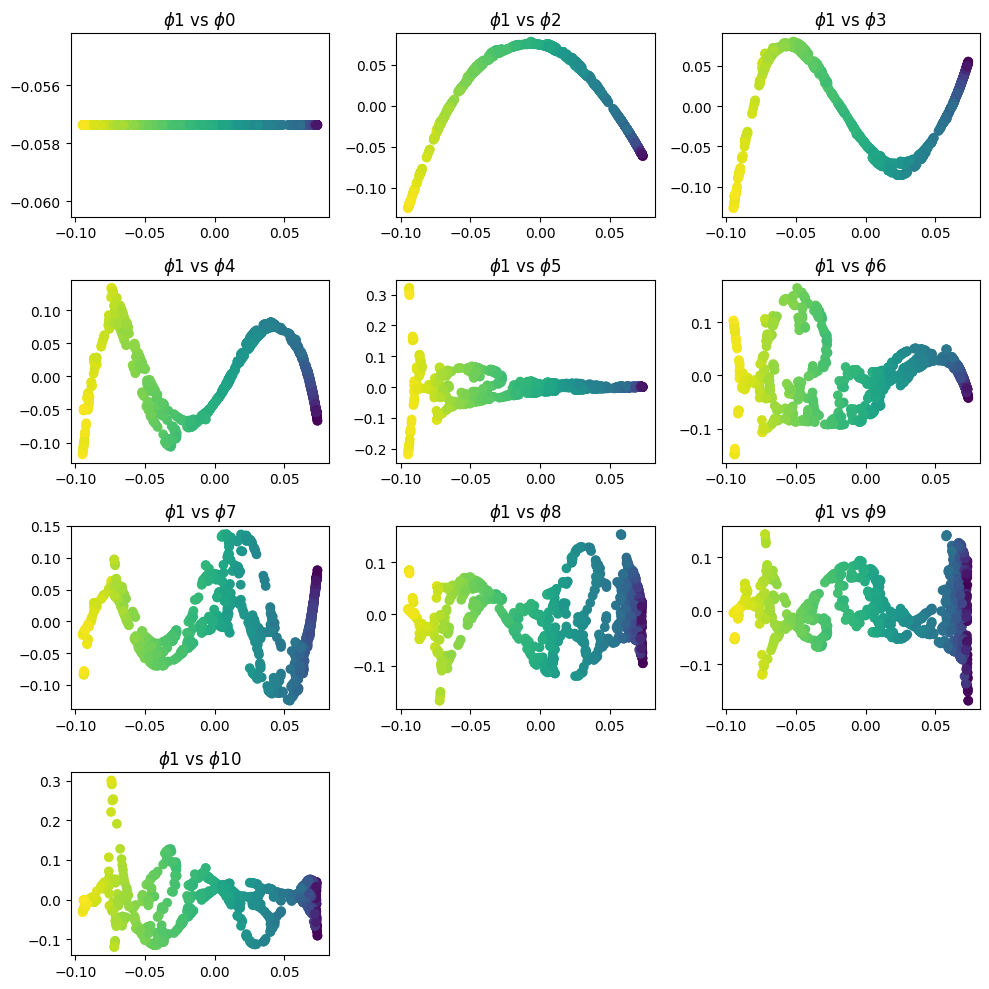

In [39]:
figname = "task2bonus_5000vals.png"
plot_phi_vals(eigenvectors, L, t, figname)

In [40]:
#manifold
X_pcm = pfold.PCManifold(x)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=2.572592110608166, cut-off=6.8839594677716995


In [41]:
eigenvalues, eigenvectors = diffusion_map(x, L, X_pcm.kernel.epsilon)

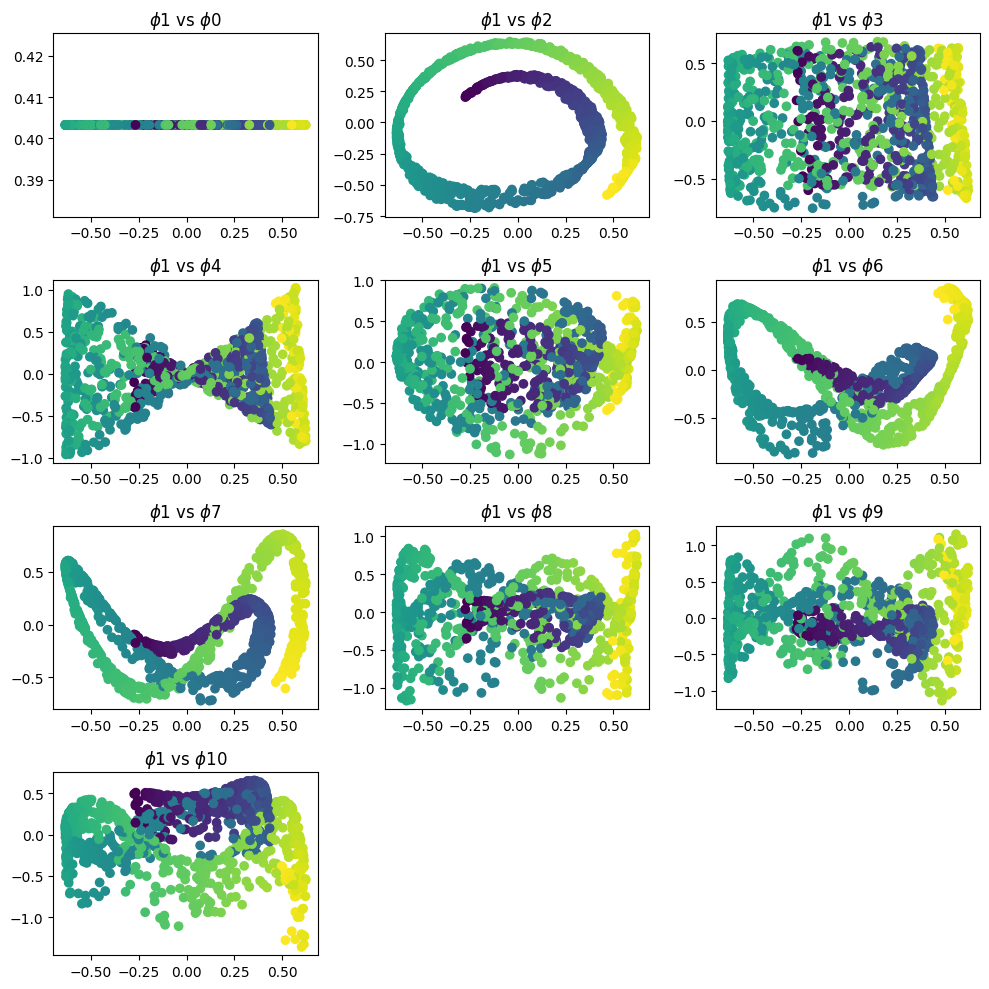

In [42]:
figname = "task2bonus_5000vals.png"
plot_phi_vals(eigenvectors, L, t, figname)

In [ ]:
# L = eigenvectors.shape[1]  # Number of eigenvectors computed

# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=(L - 1) // 2, ncols=2, figsize=(10, 20))  # Adjust the number of rows as needed

# # Flatten the array of axes for easy iteration
# axes_flattened = axes.flatten()

# # Loop over pairs of eigenvectors and plot them
# for i, ax in enumerate(axes_flattened):
#     if i < L - 1:  # To avoid index error
#         # Scatter plot of eigenvector i against eigenvector i+1
#         ax.scatter(eigenvectors[:, i], eigenvectors[:, i + 1])

#         # Set the x and y labels to corresponding eigenvector numbers
#         ax.set_xlabel(f'Eigenvalue {i+1}')
#         ax.set_ylabel(f'Eigenvalue {i+2}')

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Show the plot
# plt.show()

(<Figure size 1500x1500 with 10 Axes>,
 array([[<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{0}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{2}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{3}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{4}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{5}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{6}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{7}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{8}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{9}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{10}$'}>]],
       dtype=object))

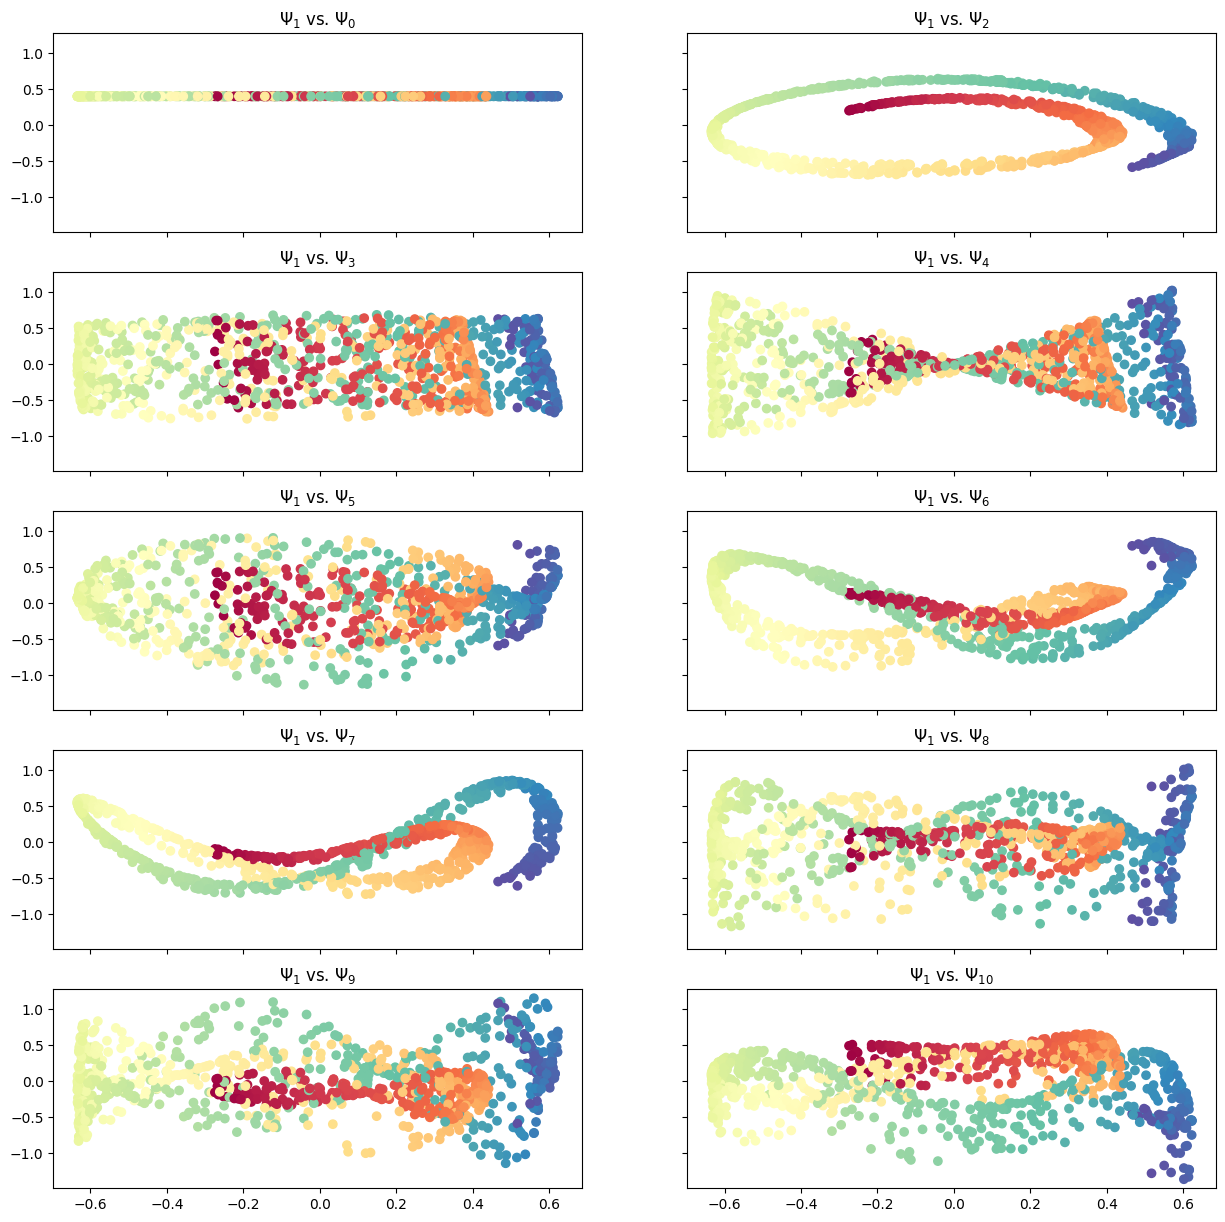

In [43]:

plot_pairwise_eigenvector(
    eigenvectors=eigenvectors,  # Use all eigenvectors directly
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=t),  # Use color for all points
)


In [44]:
# Automatic Embedding Selection
selection = LocalRegressionSelection(intrinsic_dim=2, n_subsample=500, strategy="dim").fit(eigenvectors)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

# Transforming the eigenvectors using the selection
target_mapping = selection.transform(eigenvectors)

Found parsimonious eigenvectors (indices): [1 3]


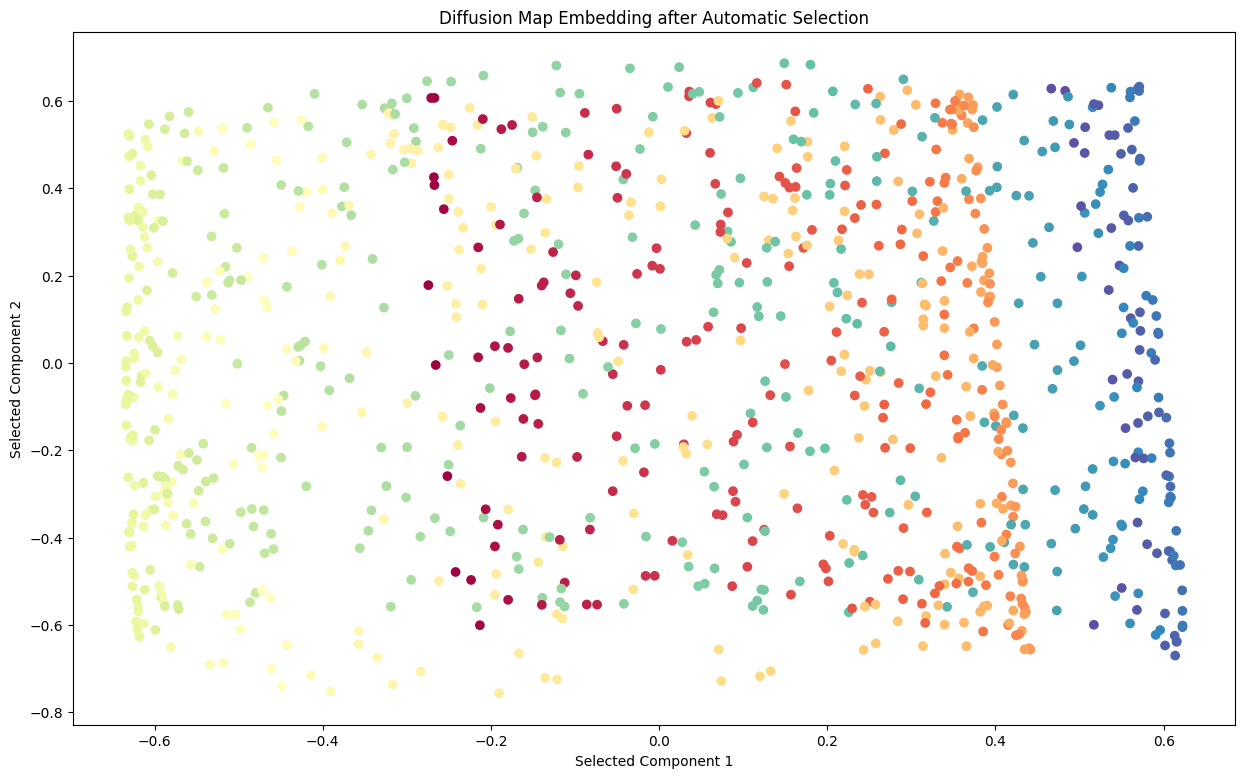

In [45]:
# Visualization of the selected embedding
f, ax = plt.subplots(figsize=(15, 9))
idx_plot = range(x.shape[0])  # Assuming you want to plot all points
ax.scatter(
    target_mapping[idx_plot, 0],
    target_mapping[idx_plot, 1],
    c=t[idx_plot],
    cmap=plt.cm.Spectral,
)
ax.set_title('Diffusion Map Embedding after Automatic Selection')
ax.set_xlabel('Selected Component 1')
ax.set_ylabel('Selected Component 2')
plt.show()

In [ ]:
import numpy as np
from sklearn.datasets import make_swiss_roll
from datafold.pcfold import PCManifold
from datafold.pcfold import kernels
from datafold.dynfold import DiffusionMaps
from datafold.dynfold import LocalRegressionSelection


In [ ]:

# Step 1: Generate Swiss roll data
X, color = make_swiss_roll(n_samples=1000, noise=0.0)

# Step 2: Optimize parameters using PCManifold
pc_manifold = PCManifold(X)
pc_manifold.optimize_parameters()

epsilon = pc_manifold.kernel.epsilon
cut_off = pc_manifold.cut_off
print(f"Optimized epsilon: {epsilon}, Optimized cut-off: {cut_off}")



Optimized epsilon: 2.7251117674832837, Optimized cut-off: 7.085083899319565


(<Figure size 1500x1500 with 10 Axes>,
 array([[<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{0}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{2}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{3}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{4}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{5}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{6}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{7}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{8}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{9}$'}>,
         <Axes: >]], dtype=object))

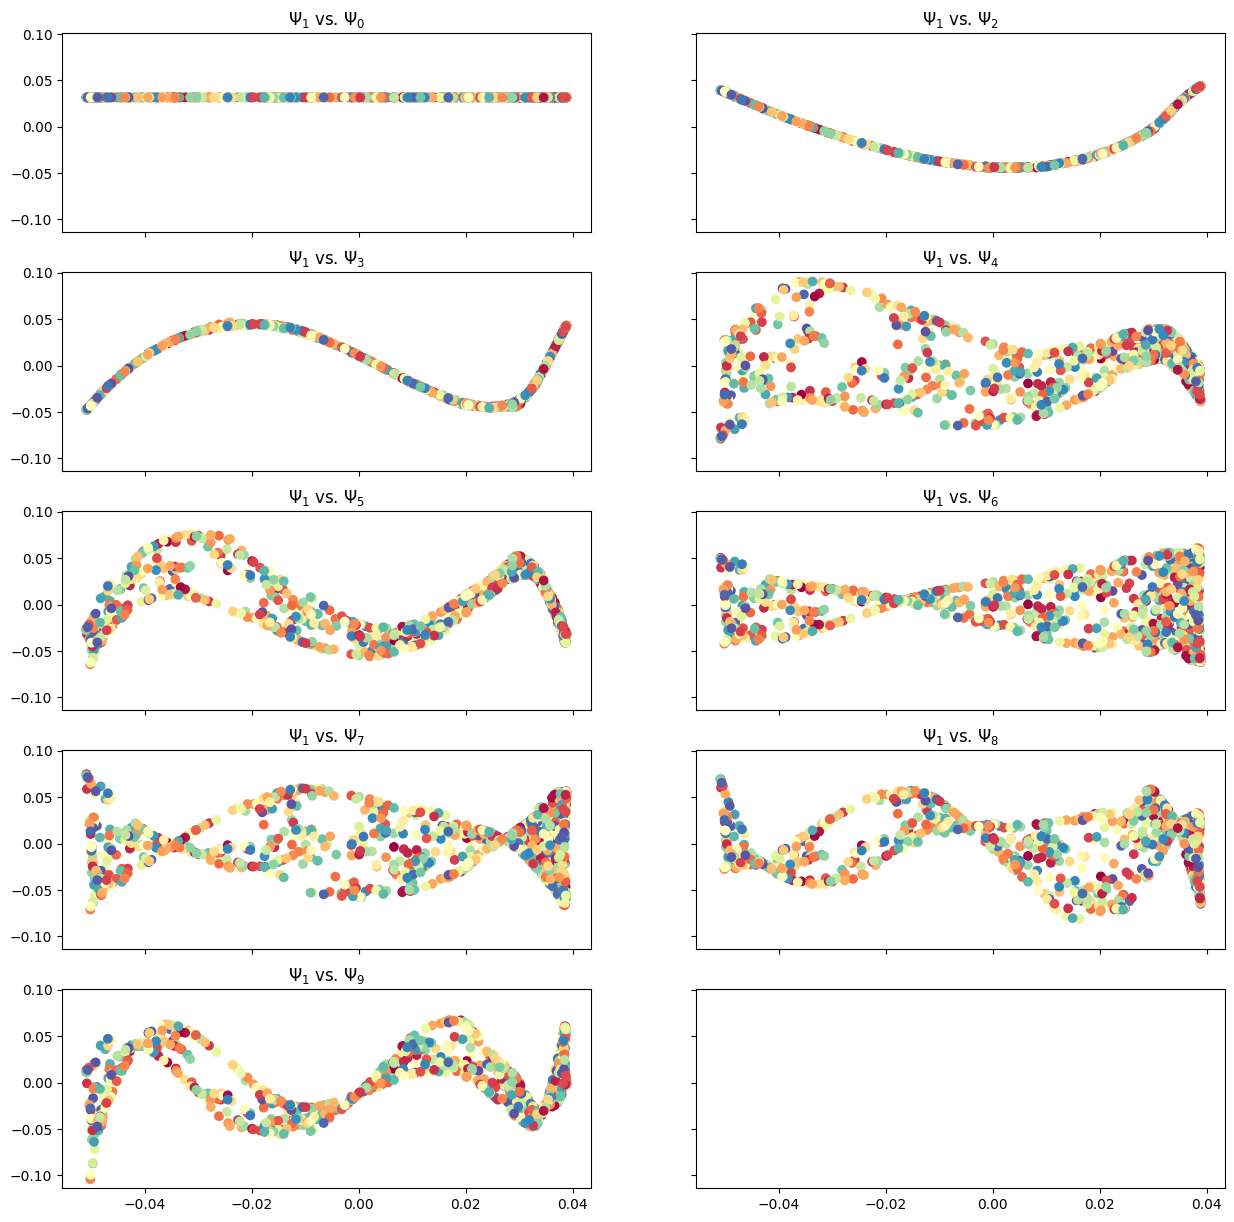

In [ ]:
# Step 3: Fit a DiffusionMaps model
diffusion_map = DiffusionMaps(
    kernel=kernels.GaussianKernel(epsilon=epsilon),
    n_eigenpairs=10,  # Number of eigenvectors and eigenvalues to compute
    alpha=1.0  # Alpha parameter can be adjusted
)

# Fit the model to the data and get the embedding
embedding = diffusion_map.fit_transform(X)

# Extract eigenvectors and eigenvalues
evecs, evals = diffusion_map.eigenvectors_, diffusion_map.eigenvalues_

# Define indices of the points to plot if not already defined
# If you want to plot all points, use all indices.
idx_plot = np.arange(X.shape[0])

# Plot pairwise eigenvectors
plot_pairwise_eigenvector(
    eigenvectors=evecs[idx_plot, :],
    n=1,  # This parameter n determines which eigenvector to plot against the others
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]),
)

# Note: The `n=1` parameter in `plot_pairwise_eigenvector` means that it will take the second eigenvector (at index 1)
# and plot it against all other eigenvectors. Adjust this according to which eigenvector you want to plot against others.


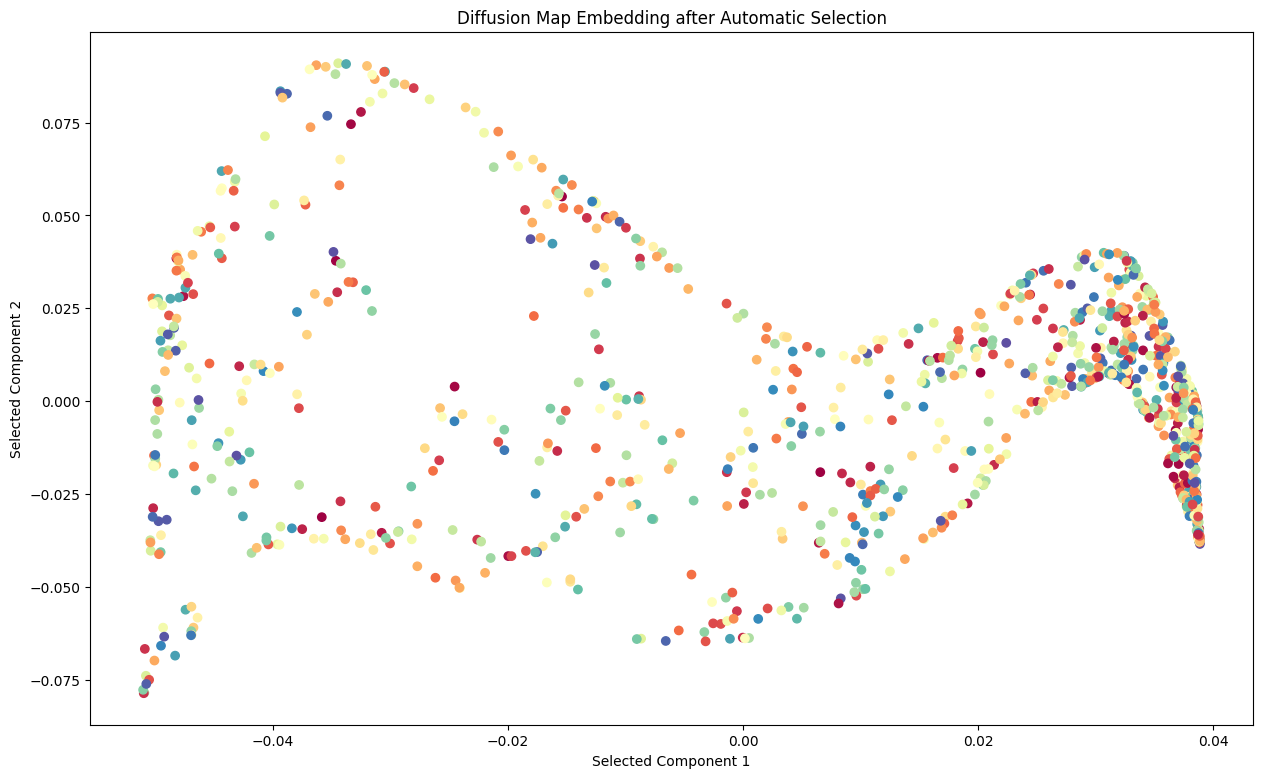

In [ ]:
# Assuming previous steps are as discussed and `diffusion_map` is the DiffusionMaps object

# Step 4: Use LocalRegressionSelection
selection = LocalRegressionSelection(
    intrinsic_dim=2,  # Desired dimensionality of the embedding
    n_subsample=300,  # Number of points to subsample for the fit
    strategy="dim"    # Strategy for selection, "dim" for dimensional selection
).fit(diffusion_map.eigenvectors_)

# Transform the eigenvectors using the selection
target_mapping = selection.transform(diffusion_map.eigenvectors_)

# Visualize the selected embedding
f, ax = plt.subplots(figsize=(15, 9))
idx_plot = np.arange(X.shape[0])  # This will use all points for plotting
ax.scatter(
    target_mapping[idx_plot, 0],  # x-coordinates
    target_mapping[idx_plot, 1],  # y-coordinates
    c=X_color[idx_plot],          # Color points using the color mapping
    cmap=plt.cm.Spectral,         # Use the spectral colormap
)
ax.set_title('Diffusion Map Embedding after Automatic Selection')
ax.set_xlabel('Selected Component 1')
ax.set_ylabel('Selected Component 2')
plt.show()
